- Anant Sabharwal
- 200968138

#### Importing basic libraries

In [2]:
! pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 3.9 MB/s eta 0:00:00a 0:00:010m
  Attempting uninstall: pip
    Found existing installation: pip 22.1.2
    Uninstalling pip-22.1.2:
      Successfully uninstalled pip-22.1.2


In [3]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 25.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 38.7 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 33.2 MB/s eta 0:00:0000:01:00:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.4.0
    Uninstalling typing_extensions-4.4.0:
      Successfully uninstalled typing_extensions-4.4.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.7.0
    Uninstalling h5py-3.7.0:
      Successfully uninstalled h5py-3.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.10.1
    Uninstalling tensorboard-2.10.1:
      Successfully uninstalled tensorboard-2.10.1
ERROR: pip's dependency resolver does not currently take into a

In [4]:
%%capture

!pip install pafy youtube-dl moviepy

In [5]:
#importing basic libraries that we might need
import os
import zipfile
import shutil
import random
import math 

import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from glob import glob

import IPython.display as ipd
from tqdm.notebook import tqdm

import subprocess

In [6]:
#importing necessary keras libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
print(f"Tensorflow version: {tf.__version__}")
print(f"Keras version: {tf.keras.__version__}")
from keras.models import Sequential
from keras.layers import Dense


Tensorflow version: 2.6.4
Keras version: 2.6.0


from google.colab import drive
drive.mount('/content/drive')

#### Performing Basic Analysis

- finding an idea about average frame rate
- getting idea about average length of video etc

In [ ]:
#converting avi file to mp4 file 

In [3]:
input_file = '../input/crick-shot/cricket_shots/cover/cover/cover_0001.avi'
subprocess.run(['ffmpeg','-i',input_file,'-qscale','0','cover_0001.mp4'])

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

CompletedProcess(args=['ffmpeg', '-i', '../input/crick-shot/cricket_shots/cover/cover/cover_0001.avi', '-qscale', '0', 'cover_0001.mp4'], returncode=0)

In [4]:
!ls -l

total 472
---------- 1 root root    263 Oct 29 16:11 __notebook_source__.ipynb
-rw-r--r-- 1 root root 478709 Oct 29 16:12 cover_0001.mp4


In [5]:
#display video in notebook

In [6]:
ipd.Video('cover_0002.mp4',width=500,embed=True)

In [7]:
#trying to read into the video metadata
cap = cv2.VideoCapture('cover_0001.mp4')

In [8]:
#number of frames in the video
cap.get(cv2.CAP_PROP_FRAME_COUNT)

50.0

In [9]:
#Height of the video
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
print(f'Height {height}, width {width}')

Height 720.0, width 1280.0


In [10]:
#get frames per second for this particular video
fps = cap.get(cv2.CAP_PROP_FPS)
print(f'FPS : {fps:0.2f}')

FPS : 25.00


In [11]:
cap.release()

In [ ]:
#pulling in Images from the video
cap = cv2.VideoCapture('cover_0001.mp4')
ret, img = cap.read()
print(f'Returned {ret} and img of shape{img.shape}')

Returned True and img of shape(720, 1280, 3)


In [ ]:
#therefore the standard size of the videos taken are of 720x1280 px
# therefore confirming the metadata

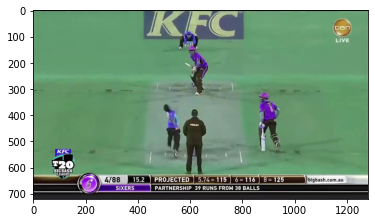

In [ ]:
plt.imshow(img)

In [ ]:
#helper function for plotting opencv images in notebook
def display_cv2_image(img,figsize=(10,10)):
  img_ = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  fig, ax = plt.subplots(figsize=figsize)
  ax.imshow(img_)
  ax.axis("off")

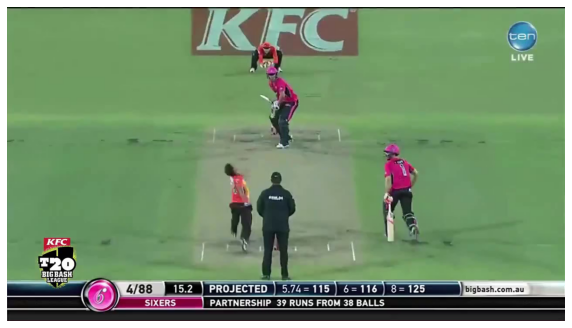

In [ ]:
display_cv2_image(img)

In [ ]:
cap.release()

In [ ]:
#display multiple frames from the video

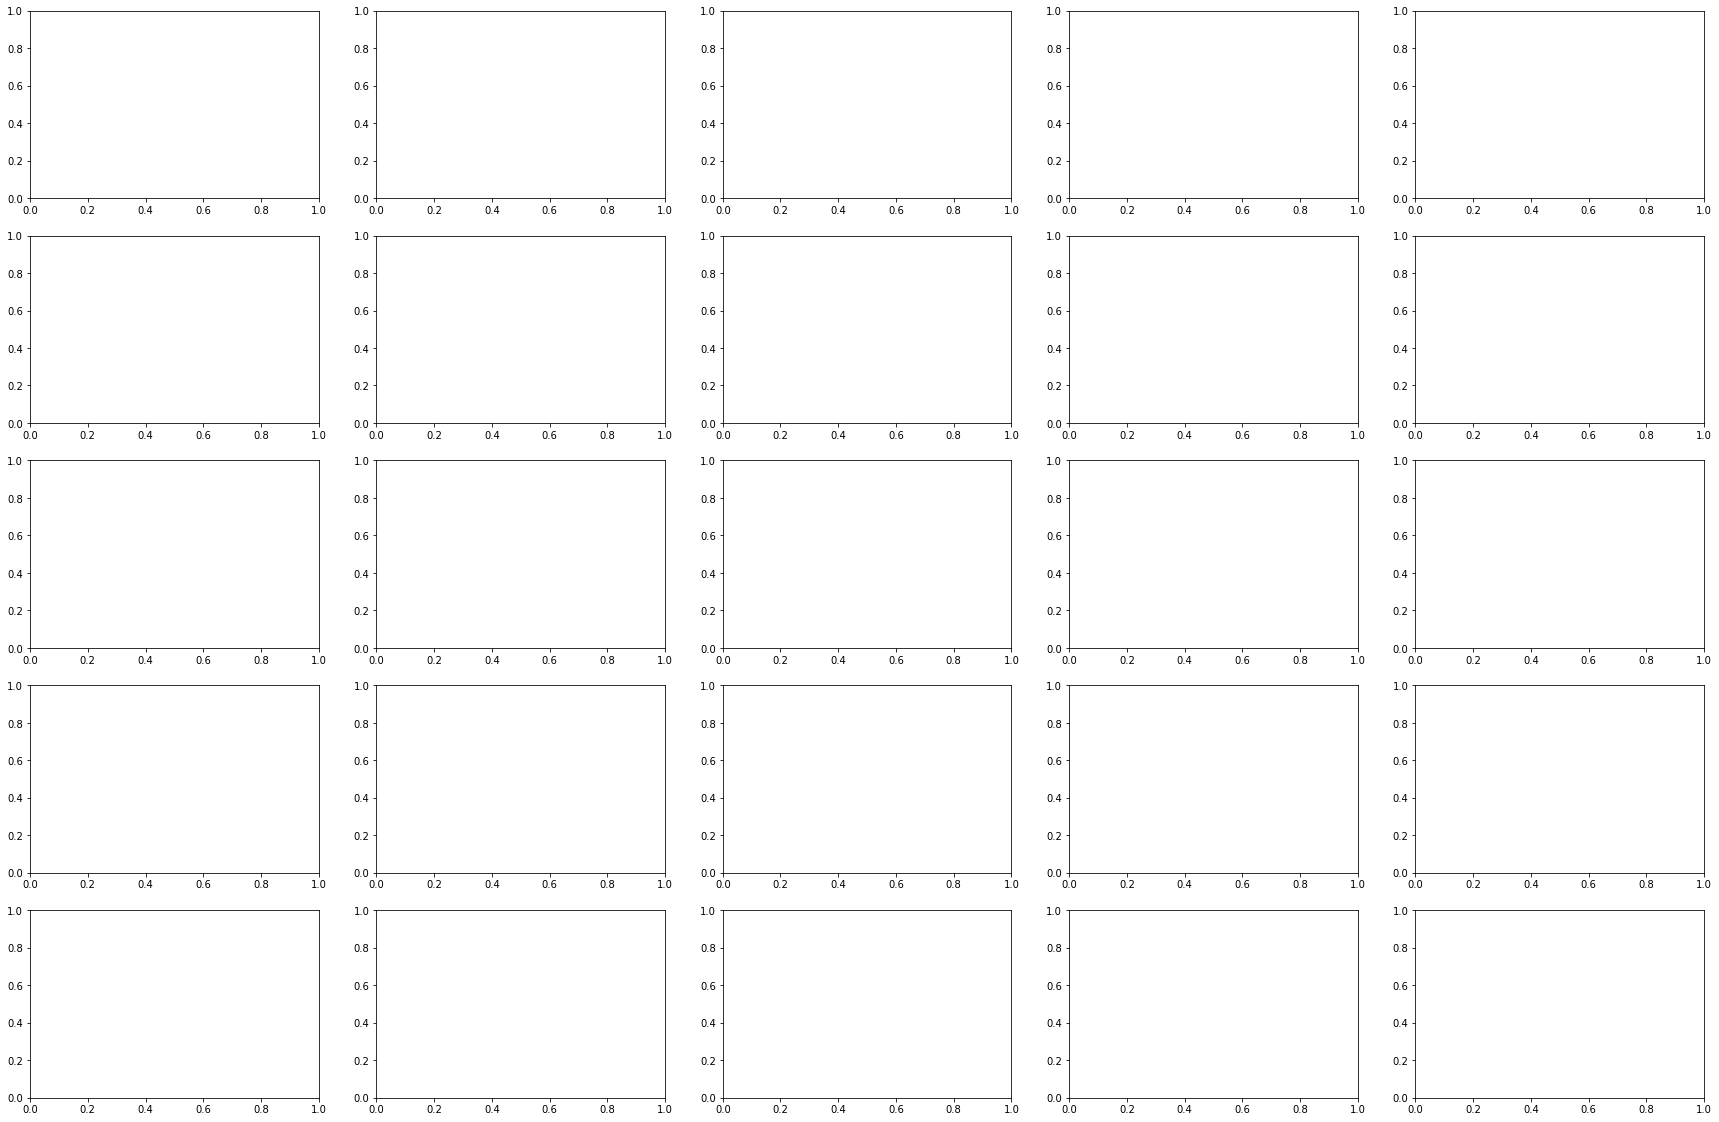

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, axs = plt.subplots(5,5,figsize=(30,20))
axs = axs.flatten()
plt.show()

cap = cv2.VideoCapture('cover_0001.mp4')
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0 
for frame in range(n_frames):
  ret, img = cap.read()
  if ret == False:
    break
  if frame % 5 == 0:
    axs[img_idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[img_idx].set_title(f'Frame: {frame}')
    axs[img_idx].axis('off')
    img_idx += 1

plt.tight_layout()
plt.show()
cap.release()

#### Visualizing the Dataset

taking one frame from each category and displaying it

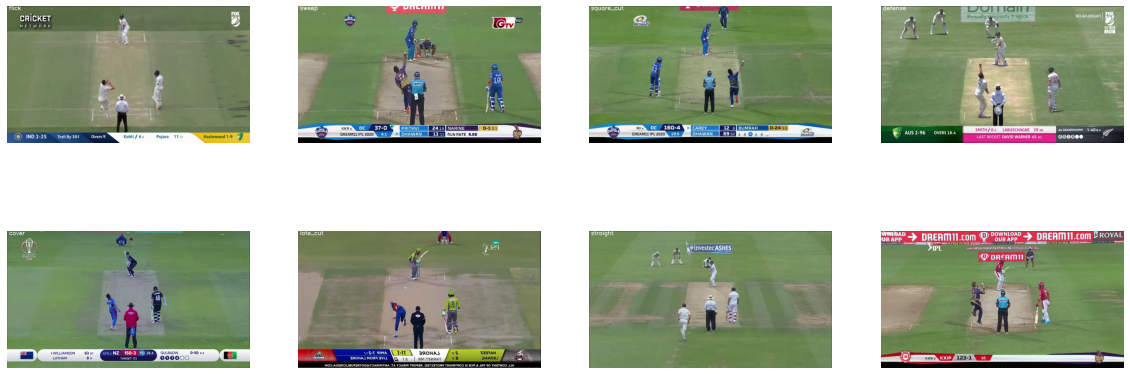

In [ ]:
plt.figure(figsize=(20,20))
all_classes_names = os.listdir('../input/crick-shot/cricket_shots')

random_range = random.sample(range(len(all_classes_names)),8)

for counter, random_index in enumerate(random_range,1):
  selected_class_name = all_classes_names[random_index]
  video_files_names_list = os.listdir(f'../input/crick-shot/cricket_shots/{selected_class_name}/{selected_class_name}')
  selected_video_file_name = random.choice(video_files_names_list)
  video_reader = cv2.VideoCapture(f'../input/crick-shot/cricket_shots/{selected_class_name}/{selected_class_name}/{selected_video_file_name}')
  _, bgr_frame = video_reader.read()
  video_reader.release()
  rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)
  cv2.putText(rgb_frame,selected_class_name,(10,20),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2)
  plt.subplot(5,4,counter)
  plt.imshow(rgb_frame)
  plt.axis('off')

#### Preprocessing the dataset

We will perform some preprocessing on the dataset. First we will read the cideo file from the dataset and resize the frames of the video to a fixed width and height , to reduce the number of computations and then we will normalize the data to the range of 0-1 by dividing the pixel value by 255. this will help in faster convergence

In [7]:
seed_constant = 27
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

In [8]:
#initializing some constants
IMAGE_HEIGHT, IMAGE_WIDTH = 180,180
#SEQUENCE_LENGTH = 20
SEQUENCE_LENGTH = 15
DATASET_DIR = "../input/crick-shot/cricket_shots"
CLASSES_LIST = ["cover","defense","flick","hook","late_cut","lofted","pull","square_cut","straight","sweep"]

In [9]:
#function to extract , resize and normalize frames
def frames_extraction(video_path):
  frames_list = []
  video_reader = cv2.VideoCapture(video_path)
  video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
  skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH),1)

  #iterating through the video
  for frame_counter in range(SEQUENCE_LENGTH):
    video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter*skip_frames_window)
    #reading the frames
    success,frame = video_reader.read()

    if not success:
      break;
    resized_frame = cv2.resize(frame,(IMAGE_HEIGHT, IMAGE_WIDTH))
    normalized_frame = resized_frame/255
    frames_list.append(normalized_frame)
  video_reader.release()
  return frames_list 

In [10]:
#function to create dataset
def create_dataset():
  features = []
  labels = []
  video_files_paths = []

  for class_index, class_name in enumerate(CLASSES_LIST):
    print(f'Extracting Data of the class :{class_name}')

    files_list = os.listdir(os.path.join(DATASET_DIR,class_name,class_name))
    for file_name in files_list:
      video_file_path = os.path.join(DATASET_DIR,class_name,class_name,file_name)
      frames = frames_extraction(video_file_path)

      if(len(frames) == SEQUENCE_LENGTH):
        features.append(frames)
        labels.append(class_index)
        video_files_paths.append(video_file_path)
  
  #converting the list to a numpy array
  features = np.array(features)
  labels = np.array(labels)

  return features, labels, video_files_paths

In [11]:
#extracting the data
features, labels, video_files_paths = create_dataset()

Extracting Data of the class :cover
Extracting Data of the class :defense
Extracting Data of the class :flick
Extracting Data of the class :hook
Extracting Data of the class :late_cut
Extracting Data of the class :lofted
Extracting Data of the class :pull
Extracting Data of the class :square_cut
Extracting Data of the class :straight
Extracting Data of the class :sweep


In [ ]:
from numpy import savetxt
savetxt('labels.csv', labels, delimiter=',')

In [12]:
np.save('labels', labels)

In [13]:
np.save('features',features)

In [12]:
#converting labels into one-hot encoded vectors
one_hot_encoded_labels = tf.keras.utils.to_categorical(labels)

#### Splitting data into train and test

In [13]:
features_train,features_test,labels_train,labels_test = train_test_split(features,one_hot_encoded_labels,
                                                                         test_size=0.20,shuffle=True,random_state = seed_constant)

#### Creating the models

In [14]:
# helper function to plot the graphs for all the models

def plot_metric(model_training_history,metric_name_1,metric_name_2,plot_name):
  metric_value_1 = model_training_history.history[metric_name_1]
  metric_value_2 = model_training_history.history[metric_name_2]
  epochs = range(len(metric_value_1))
  plt.plot(epochs,metric_value_1,"blue",label = metric_name_1)
  plt.plot(epochs,metric_value_2,"red",label = metric_name_2)
  plt.title(str(plot_name))
  plt.legend()

##### CNN-GRU

In [32]:
def create_cnn_gru():
    model = Sequential()
    #model_cnn_gru.add(tf.keras.layers.InputLayer())

    model.add(TimeDistributed(Conv2D(64,(3,3),padding='same',activation='relu'),input_shape=(SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH,3)))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(MaxPooling2D((2,2))))

    model.add(TimeDistributed(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(TimeDistributed(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(MaxPooling2D((2,2))))

    model.add(TimeDistributed(Conv2D(256,(3,3),padding='same',activation='relu'))
    model.add(TimeDistributed(Conv2D(256,(3,3),padding='same',activation='relu'))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(MaxPooling2D((2,2))))

    model.add(TimeDistributed(Conv2D(384,(3,3),padding='same',activation='relu'))
    model.add(TimeDistributed(Conv2D(384,(3,3),padding='same',activation='relu'))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(MaxPooling2D((2,2))))

    model.add(TimeDistributed(Conv2D(480,(3,3),padding='same',activation='relu'))
    model.add(TimeDistributed(Conv2D(480,(3,3),padding='same',activation='relu'))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(MaxPooling2D((2,2))))
    model.add(TimeDistributed(Flatten()))

    model.add(GRU(180))

    model.add(Dense(512, activation = "relu"))
    model.add(Dense(128, activation = "relu"))
    model.add(Dense(64, activation = "relu"))
    model.add(Dense(len(CLASSES_LIST), activation = 'softmax'))

    model.summary()
    return model

SyntaxError: invalid syntax (2428771035.py, line 10)

In [20]:
CNN_GRU_model = create_cnn_gru()

NameError: name 'create_cnn_gru' is not defined

In [ ]:
plot_model(CNN_GRU_model,  show_shapes=True, show_layer_names=True)

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.0001,momentum = 0.9)

CNN_GRU_model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

CNN_GRU_model_training_history = CNN_GRU_model.fit(x = features_train, y = labels_train, epochs = 70, batch_size = 4, shuffle = True, validation_split = 0.2, callbacks=[early_stopping_callback])

In [ ]:
model_evaluate_history = CNN_GRU_model.evaluate(features_test, labels_test)

In [ ]:
CNN_GRU_model_eval_loss, CNN_GRU_model_eval_acc = CNN_GRU_model_training_history

date_time_format = '%Y_%n_%d__%H_%H_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt,date_time_format)

model_file_name = f'CNN_GRU__Date_Time_{current_date_time_string}__Loss__{CNN_GRU_model_eval_loss}__Accuracy_{CNN_GRU_model_eval_acc}.h5'

CNN_GRU_model.save(model_file_name)

In [ ]:
plot_metric(CNN_GRU_model_training_history,"loss","val_loss","Total loss vs total validation_loss")

In [ ]:
plot_metric(CNN_GRU_model_training_history,"accuracy","val_accuracy","Total accuracy vs total validation accuracy")

##### DCNN - GRU

In [34]:
def create_dcnn_gru():
    d_cnn_gru = Sequential()

    #model_cnn_gru.add(tf.keras.layers.InputLayer())
    d_cnn_gru.add(TimeDistributed(Conv2D(96,(3,3),padding='valid',activation='relu',dilation_rate=2),input_shape=(SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH,3)))
    d_cnn_gru.add(TimeDistributed(BatchNormalization()))
    d_cnn_gru.add(TimeDistributed(MaxPooling2D((2,2))))

    d_cnn_gru.add(TimeDistributed(Conv2D(128,(3,3),padding='valid',activation='relu',dilation_rate=2))
    d_cnn_gru.add(TimeDistributed(Conv2D(128,(3,3),padding='valid',activation='relu',dilation_rate=2))
    d_cnn_gru.add(TimeDistributed(BatchNormalization()))
    d_cnn_gru.add(TimeDistributed(MaxPooling2D((2,2))))

    d_cnn_gru.add(TimeDistributed(Conv2D(480,(3,3),padding='valid',activation='relu',dilation_rate=2))
    d_cnn_gru.add(TimeDistributed(Conv2D(480,(3,3),padding='valid',activation='relu',dilation_rate=2))
    d_cnn_gru.add(TimeDistributed(BatchNormalization()))
    d_cnn_gru.add(TimeDistributed(MaxPooling2D((2,2))))

    d_cnn_gru.add(TimeDistributed(Conv2D(768,(3,3),padding='valid',activation='relu',dilation_rate=2))
    d_cnn_gru.add(TimeDistributed(Conv2D(768,(3,3),padding='valid',activation='relu',dilation_rate=2))
    d_cnn_gru.add(TimeDistributed(BatchNormalization()))
    d_cnn_gru.add(TimeDistributed(MaxPooling2D((2,2))))

    #d_cnn_gru.add(tf.keras.layers.TimeDistributed(Conv2D(128,(3,3),padding='valid',activation='relu'))
    #d_cnn_gru.add(tf.keras.layers.TimeDistributed(Conv2D(128,(3,3),padding='valid',activation='relu'))
    #d_cnn_gru.add(tf.keras.layers.TimeDistributed(BatchNormalization()))
    #d_cnn_gru.add(tf.keras.layers.TimeDistributed(MaxPooling2D((2,2))))

    d_cnn_gru.add(GRU(180))

    d_cnn_gru.add(Dense(512, activation = "relu"))
    d_cnn_gru.add(Dense(128, activation = "relu"))
    d_cnn_gru.add(Dense(64, activation = "relu"))
    d_cnn_gru.add(Dense(len(CLASSES_LIST), activation = 'softmax'))
    d_cnn_gru.summary()
    return d_cnn_gru

SyntaxError: invalid syntax (2130659276.py, line 10)

In [ ]:
DCNN_GRU_model = create_dcnn_gru()

In [ ]:
plot_model(DCNN_GRU_model,  show_shapes=True, show_layer_names=True)

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.0001,momentum = 0.9)

DCNN_GRU_model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

DCNN_GRU_model_training_history = DCNN_GRU_model.fit(x = features_train, y = labels_train, epochs = 70, batch_size = 4, shuffle = True, validation_split = 0.2, callbacks=[early_stopping_callback])

In [ ]:
model_evaluate_history = DCNN_GRU_model.evaluate(features_test, labels_test)

In [ ]:
DCNN_GRU_model_eval_loss, DCNN_GRU_model_eval_acc = DCNN_GRU_model_training_history

date_time_format = '%Y_%n_%d__%H_%H_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt,date_time_format)

model_file_name = f'DCNN_GRU__Date_Time_{current_date_time_string}__Loss__{DCNN_GRU_model_eval_loss}__Accuracy_{DCNN_GRU_model_eval_acc}.h5'

DCNN_GRU_model.save(model_file_name)

In [ ]:
plot_metric(DCNN_GRU_model_training_history,"loss","val_loss","Total loss vs total validation_loss")

In [ ]:
plot_metric(DCNN_GRU_model_training_history,"accuracy","val_accuracy","Total accuracy vs total validation accuracy")

##### Tranfer Learning Approach

###### VGG Net 16

In [39]:
from keras.applications.vgg16 import VGG16
base_model_vgg = VGG16(input_shape=(180,180,3), weights='imagenet', include_top=False)
base_model_vgg.trainable = False #freeze the layers
base_model_vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 180, 180, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 180, 180, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 90, 90, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 90, 90, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 90, 90, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 45, 45, 128)       0     

###### frozen 4 layers

In [54]:
for layer in base_model_vgg.layers[-4:]:
    layer.trainable = True

In [55]:
from tensorflow.keras.layers import Dense,Flatten

In [56]:
model_vgg_f4 = tf.keras.Sequential([
    base_model_vgg,
    #tf.keras.layers.TimeDistributed(base_model_vgg),
    tf.keras.layers.TimeDistributed(Flatten()),
    tf.keras.layers.GRU(128),
    tf.keras.layers.Dense(512, activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(64, activation = "relu"),
    tf.keras.layers.Dense(len(CLASSES_LIST), activation = 'softmax')
])

In [57]:
model_vgg_f4.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 5, 5, 512)         14714688  
_________________________________________________________________
time_distributed_16 (TimeDis (None, 5, 2560)           0         
_________________________________________________________________
gru_8 (GRU)                  (None, 128)               1032960   
_________________________________________________________________
dense_33 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_34 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_35 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_36 (Dense)             (None, 10)               

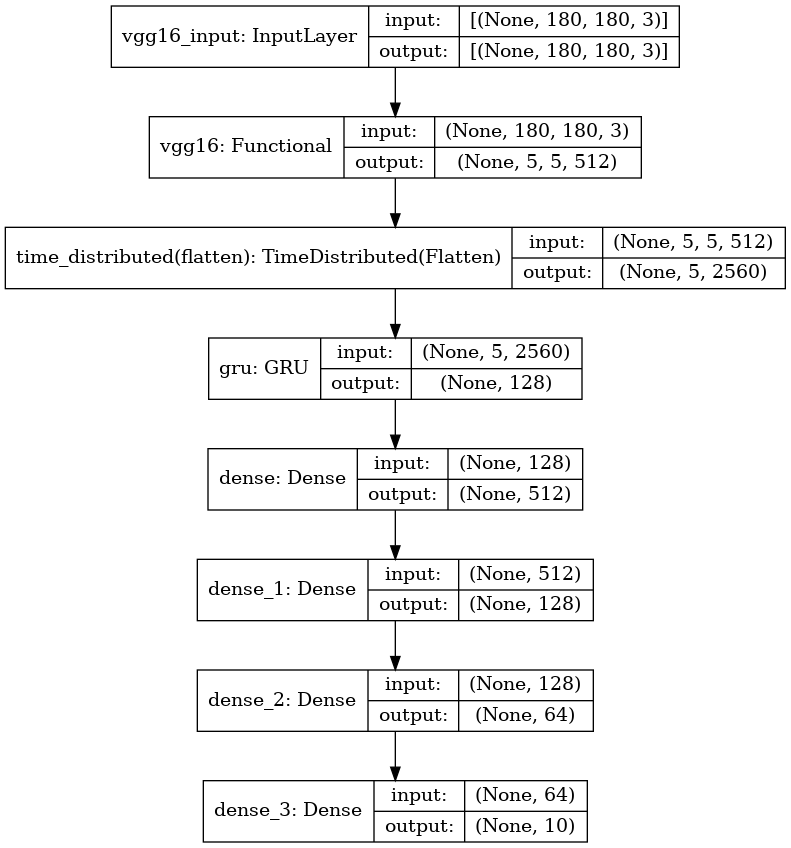

In [27]:
plot_model(model_vgg_f4,  show_shapes=True, show_layer_names=True)

In [ ]:
model_vgg_f4.compile(loss = "categorical_crossentropy", optimizer='Adam',metrics = ["accuracy"])
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', restore_best_weights = True)
model_vgg_f4_training_history = model_vgg_f4.fit(x = features_train, y = labels_train, epochs = 30, batch_size = 4, shuffle = True, validation_split = 0.2, callbacks=[early_stopping_callback])

In [ ]:
model_evaluate_history = model_vgg_f4.evaluate(features_test, labels_test)

In [ ]:
model_vgg_f4_eval_loss, model_vgg_f4_eval_acc = model_vgg_f4_training_history

date_time_format = '%Y_%n_%d__%H_%H_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt,date_time_format)

model_file_name = f'VGGf4__Date_Time_{current_date_time_string}__Loss__{model_vgg_f4_eval_loss}__Accuracy_{model_vgg_f4_eval_acc}.h5'

model_vgg_f4.save(model_file_name)

In [ ]:
plot_metric(model_vgg_f4_training_history,"loss","val_loss","Total loss vs total validation_loss")

In [ ]:
plot_metric(model_vgg_f4_training_history,"accuracy","val_accuracy","Total accuracy vs total validation accuracy")

###### frozen 8 layers

In [43]:
for layer in base_model_vgg.layers[-8:]:
    layer.trainable = True

In [51]:
model_vgg_f8 = tf.keras.Sequential([
    
    base_model_vgg,
    tf.keras.layers.TimeDistributed(Flatten()),
    tf.keras.layers.GRU(128),
    tf.keras.layers.Dense(512, activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(64, activation = "relu"),
    tf.keras.layers.Dense(len(CLASSES_LIST), activation = 'softmax')
])

In [52]:
model_vgg_f8.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 5, 5, 512)         14714688  
_________________________________________________________________
time_distributed_14 (TimeDis (None, 5, 2560)           0         
_________________________________________________________________
gru_6 (GRU)                  (None, 128)               1032960   
_________________________________________________________________
dense_25 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_26 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_27 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_28 (Dense)             (None, 10)               

In [ ]:
plot_model(model_vgg_f8,  show_shapes=True, show_layer_names=True)

In [ ]:
model_vgg_f8.compile(loss = "categorical_crossentropy", optimizer='Adam',metrics = ["accuracy"])
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', restore_best_weights = True)
model_vgg_f8_training_history = model_vgg_f8.fit(x = features_train, y = labels_train, epochs = 70, batch_size = 4, shuffle = True, validation_split = 0.2, callbacks=[early_stopping_callback])

In [ ]:
model_evaluate_history = model_vgg_f8.evaluate(features_test, labels_test)

In [ ]:
model_vgg_f8_eval_loss, model_vgg_f8_eval_acc = model_vgg_f8_training_history

date_time_format = '%Y_%n_%d__%H_%H_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt,date_time_format)

model_file_name = f'VGGf8__Date_Time_{current_date_time_string}__Loss__{model_vgg_f8_eval_loss}__Accuracy_{model_vgg_f8_eval_acc}.h5'

model_vgg_f8.save(model_file_name)

In [ ]:
plot_metric(model_vgg_f8_training_history,"loss","val_loss","Total loss vs total validation_loss")

plot_metric(model_vgg_f8_training_history,"accuracy","val_accuracy","Total accuracy vs total validation accuracy")

3D CNN

def create_3DCNN():
  CNN_3D = tf.keras.Sequential()

  CNN_3D.add(tf.keras.layers.InputLayer())

  CNN_3D.add(tf.keras.layers.Conv3D())
  CNN_3D.add(tf.keras.layers.BatchNormalization())
  CNN_3D.add(tf.keras.layers.MaxPooling3D())

  CNN_3D.add(tf.keras.layers.Conv3D())
  CNN_3D.add(tf.keras.layers.Conv3D())
  CNN_3D.add(tf.keras.layers.BatchNormalization())
  CNN_3D.add(tf.keras.layers.MaxPooling2D())
  

##### ConvLSTM


To construct the model, we will use Keras ConvLSTM2D recurrent layers. The ConvLSTM2D layer also takes the number of filters and kernel size required for applying the convolution operation. The output of the layer is flattened in the end and fed to a dense layer with softmax activation which outputs the output of each action category.

MaxPooling3D layer is also used to reduce the dimentions of the frames and avoid unnecessary computations. Dropout layer is added to prevent overfitting the model on the data.

We are using a 3x3 kernel size as it works well in almost all scenarios. We could use 5x5 also but 3x3 is a goood starting point. 

In [15]:
from tensorflow.keras.layers import Dropout

In [16]:
import datetime

In [17]:
from tensorflow.keras.layers import TimeDistributed,Conv2D,MaxPooling2D,LSTM,Dropout,Flatten

In [27]:
def create_convLSTM_model():
    convLSTM_model = Sequential()
    
    convLSTM_model.add(layers.ConvLSTM2D(filters = 4, kernel_size = (3,3), activation = 'tanh', data_format = "channels_last", recurrent_dropout=0.2,return_sequences=True, input_shape=(SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH,3)))
    convLSTM_model.add(layers.MaxPooling3D(pool_size=(1,2,2),padding = "same", data_format = "channels_last"))
    convLSTM_model.add(layers.TimeDistributed(Dropout(0.2)))

    convLSTM_model.add(layers.ConvLSTM2D(filters = 8, kernel_size = (3,3), activation = 'tanh', data_format = "channels_last", recurrent_dropout=0.2,return_sequences=True))
    convLSTM_model.add(layers.MaxPooling3D(pool_size=(1,2,2),padding = "same", data_format = "channels_last"))
    convLSTM_model.add(layers.TimeDistributed(Dropout(0.2)))

    convLSTM_model.add(layers.ConvLSTM2D(filters = 14, kernel_size = (3,3), activation = 'tanh', data_format = "channels_last", recurrent_dropout=0.2,return_sequences=True))
    convLSTM_model.add(layers.MaxPooling3D(pool_size=(1,2,2),padding = "same", data_format = "channels_last"))
    convLSTM_model.add(layers.TimeDistributed(Dropout(0.2)))

    convLSTM_model.add(layers.ConvLSTM2D(filters = 16, kernel_size = (3,3), activation = 'tanh', data_format = "channels_last", recurrent_dropout=0.2,return_sequences=True))
    convLSTM_model.add(layers.MaxPooling3D(pool_size=(1,2,2),padding = "same", data_format = "channels_last"))
    convLSTM_model.add(layers.TimeDistributed(Dropout(0.2)))

    convLSTM_model.add(layers.Flatten())

    convLSTM_model.add(layers.Dense(len(CLASSES_LIST), activation = "softmax"))

    convLSTM_model.summary()

    return convLSTM_model

In [28]:
convLSTM2D_model = create_convLSTM_model()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d (ConvLSTM2D)    (None, 15, 178, 178, 4)   1024      
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 15, 89, 89, 4)     0         
_________________________________________________________________
time_distributed_13 (TimeDis (None, 15, 89, 89, 4)     0         
_________________________________________________________________
conv_lst_m2d_1 (ConvLSTM2D)  (None, 15, 87, 87, 8)     3488      
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 15, 44, 44, 8)     0         
_________________________________________________________________
time_distributed_14 (TimeDis (None, 15, 44, 44, 8)     0         
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  (None, 15, 42, 42, 14)   

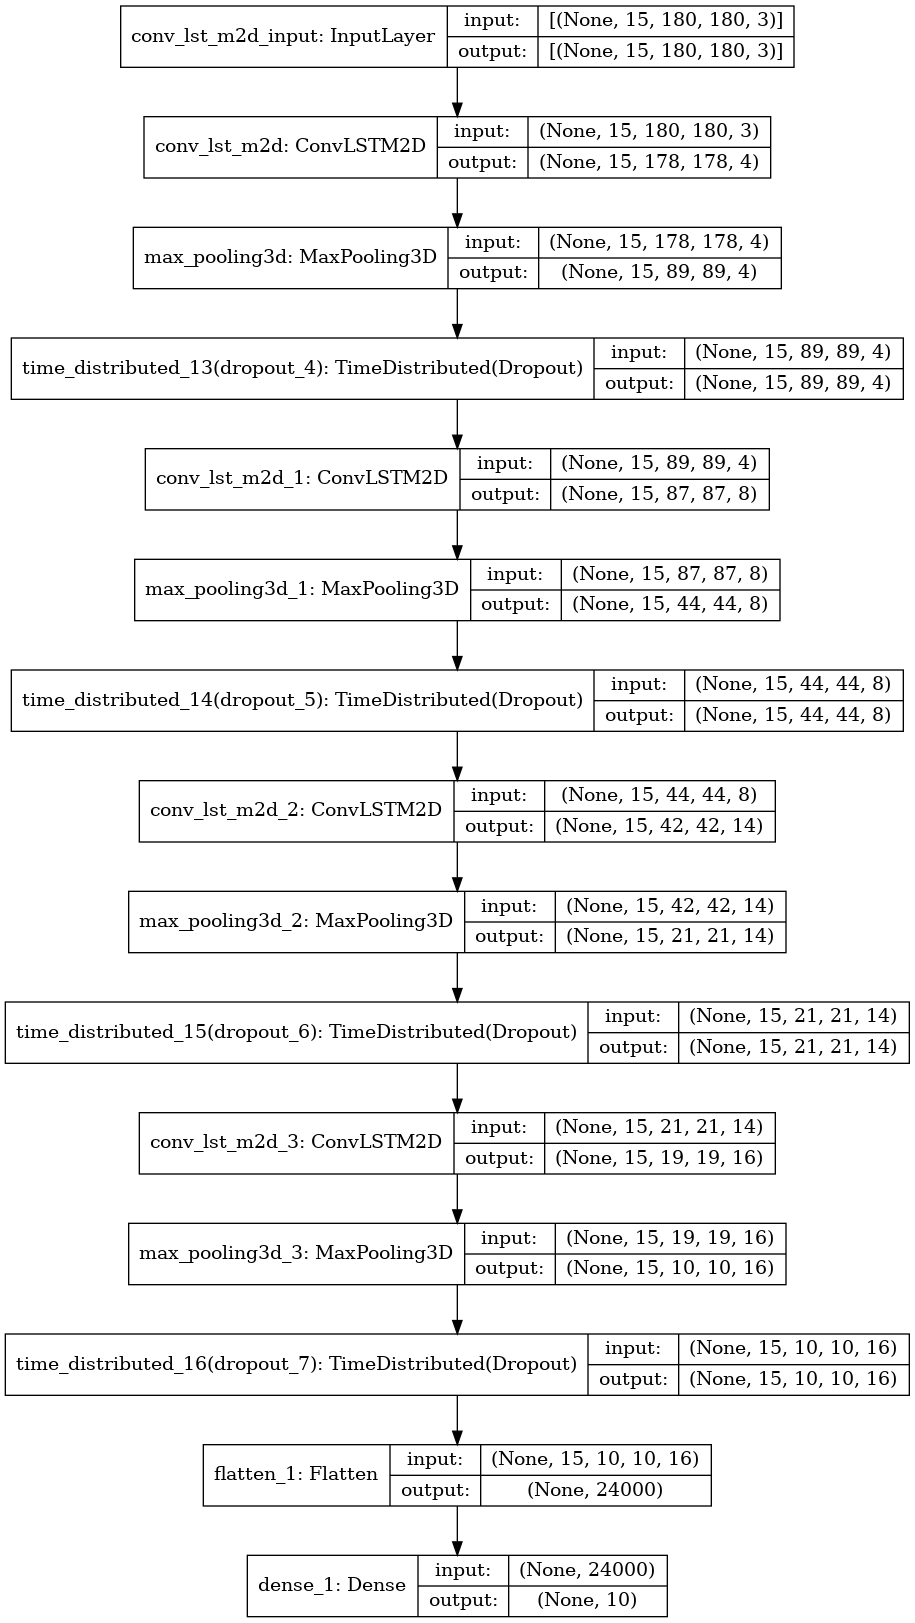

In [29]:
plot_model(convLSTM2D_model,  show_shapes=True, show_layer_names=True)

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
#creating an instance for early stopping callback
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', restore_best_weights = True)

In [29]:
convLSTM2D_model.compile(loss = "categorical_crossentropy", optimizer='Adam',metrics = ["accuracy"])

convLSTM2D_model_training_history = convLSTM2D_model.fit(x = features_train, y = labels_train, epochs = 20, batch_size = 4, shuffle = True, validation_split = 0.2, callbacks=[early_stopping_callback])

Epoch 1/20
120/120 [==============================] - 232s 2s/step - loss: 2.3110 - accuracy: 0.1063 - val_loss: 2.2978 - val_accuracy: 0.1000
Epoch 2/20
120/120 [==============================] - 221s 2s/step - loss: 2.1648 - accuracy: 0.2208 - val_loss: 2.0171 - val_accuracy: 0.2833
Epoch 3/20
120/120 [==============================] - 219s 2s/step - loss: 1.9562 - accuracy: 0.3208 - val_loss: 1.9342 - val_accuracy: 0.3250
Epoch 4/20
120/120 [==============================] - 217s 2s/step - loss: 1.7269 - accuracy: 0.4229 - val_loss: 1.8582 - val_accuracy: 0.3833
Epoch 5/20
120/120 [==============================] - 216s 2s/step - loss: 1.4726 - accuracy: 0.5063 - val_loss: 2.1226 - val_accuracy: 0.3000
Epoch 6/20
120/120 [==============================] - 218s 2s/step - loss: 1.0886 - accuracy: 0.6313 - val_loss: 2.5977 - val_accuracy: 0.3167
Epoch 7/20
120/120 [==============================] - 217s 2s/step - loss: 0.6960 - accuracy: 0.7479 - val_loss: 2.5132 - val_accuracy: 0.3917

In [30]:
#evaluating the model
model_evaluate_history = convLSTM2D_model.evaluate(features_test, labels_test)

5/5 [==============================] - 11s 2s/step - loss: 1.9607 - accuracy: 0.3333


In [31]:
#saving the model to avoid training it all the time
convLSTM2D_model_eval_loss, convLSTM2D_model_eval_acc = model_evaluate_history

date_time_format = '%Y_%n_%d__%H_%H_%S'
current_date_time_dt = datetime.datetime.now()
current_date_time_string = datetime.datetime.strftime(current_date_time_dt,date_time_format)

model_file_name = f'convlstm_{current_date_time_string}.h5'

convLSTM2D_model.save(model_file_name)

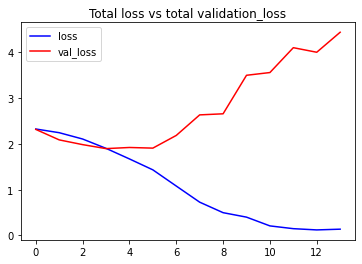

In [21]:
#plotting graph for above
plot_metric(convLSTM2D_model_training_history,"loss","val_loss","Total loss vs total validation_loss")

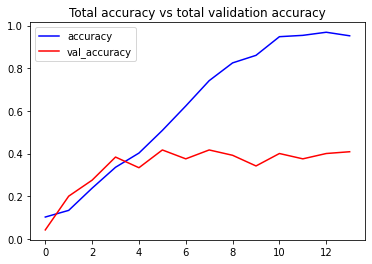

In [22]:
plot_metric(convLSTM2D_model_training_history,"accuracy","val_accuracy","Total accuracy vs total validation accuracy")

##### LRCN


Here we will implement a Long Term Recurrent Convolutional Network. This combines the LSTM and CNN layers in a single model. CNN used to extract features from the frames while the LSTM is used to pass the features in a sequence

In [20]:
from tensorflow.keras.layers import TimeDistributed,Conv2D,MaxPooling2D,LSTM,Dropout,Flatten

In [21]:
def create_LRCN_model():
          
    model = Sequential()

    model.add(TimeDistributed(Conv2D(16,(3,3),padding='same',activation='relu'),input_shape=(SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH,3)))
    model.add(TimeDistributed(MaxPooling2D((4,4))))
    model.add(TimeDistributed(Dropout(0.25)))

    model.add(TimeDistributed(Conv2D(32,(3,3),padding='same',activation='relu')))
    model.add(TimeDistributed(MaxPooling2D((4,4))))
    model.add(TimeDistributed(Dropout(0.25)))

    model.add(TimeDistributed(Conv2D(64,(3,3),padding='same',activation='relu')))
    model.add(TimeDistributed(MaxPooling2D((2,2))))
    model.add(TimeDistributed(Dropout(0.25)))

    model.add(TimeDistributed(Conv2D(64,(3,3),padding='same',activation='relu')))
    model.add(TimeDistributed(MaxPooling2D((2,2))))
    model.add(TimeDistributed(Dropout(0.25)))

    model.add(TimeDistributed(Flatten()))

    model.add(LSTM(32))

    model.add(Dense(len(CLASSES_LIST), activation = 'softmax'))

    model.summary()
    return model

In [22]:
LRCN_model = create_LRCN_model()

2022-11-07 04:58:33.480895: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 15, 180, 180, 16)  448       
_________________________________________________________________
time_distributed_1 (TimeDist (None, 15, 45, 45, 16)    0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 15, 45, 45, 16)    0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 15, 45, 45, 32)    4640      
_________________________________________________________________
time_distributed_4 (TimeDist (None, 15, 11, 11, 32)    0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, 15, 11, 11, 32)    0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, 15, 11, 11, 64)    1

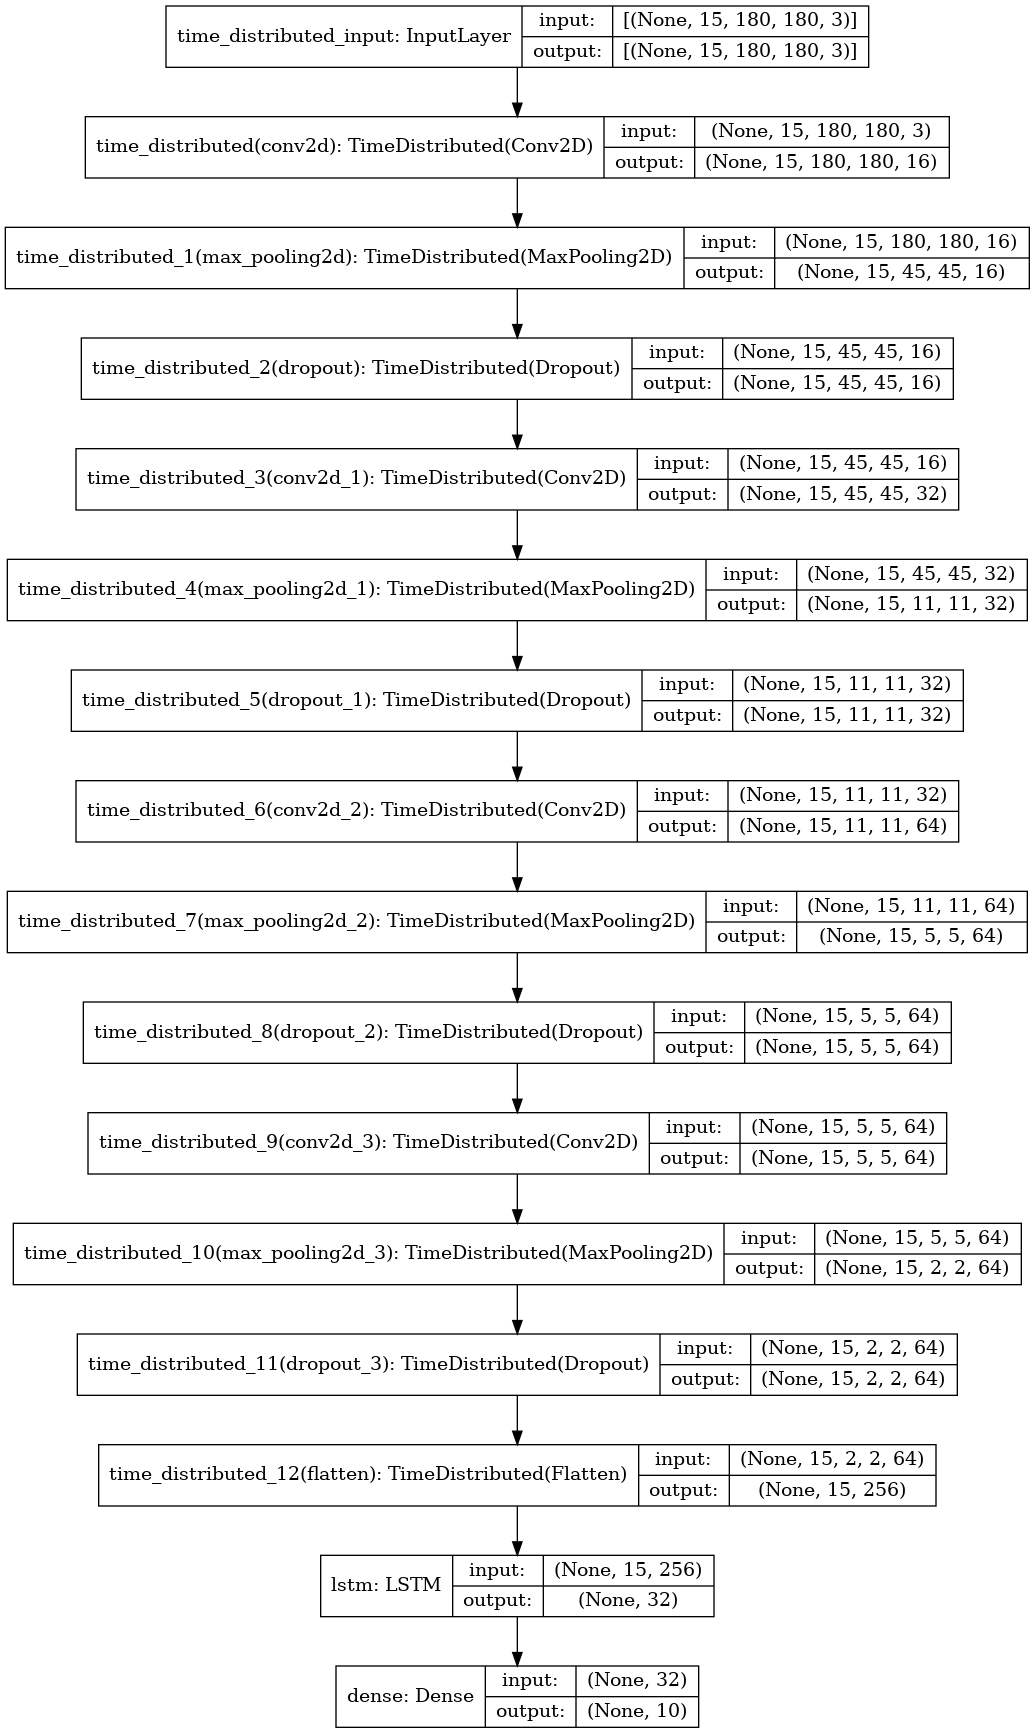

In [23]:
plot_model(LRCN_model,  show_shapes=True, show_layer_names=True)

In [24]:
LRCN_model.compile(loss = "categorical_crossentropy", optimizer='Adam',metrics = ["accuracy"])

LRCN_model_training_history_ = LRCN_model.fit(x = features_train, y = labels_train, epochs = 30, batch_size = 4, shuffle = True, validation_split = 0.2, callbacks=[early_stopping_callback])

2022-11-07 04:58:47.458703: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
120/120 [==============================] - 21s 159ms/step - loss: 2.3343 - accuracy: 0.1187 - val_loss: 2.3042 - val_accuracy: 0.1000
Epoch 2/30
120/120 [==============================] - 17s 144ms/step - loss: 2.3005 - accuracy: 0.1125 - val_loss: 2.2825 - val_accuracy: 0.1083
Epoch 3/30
120/120 [==============================] - 18s 148ms/step - loss: 2.1018 - accuracy: 0.2646 - val_loss: 2.0781 - val_accuracy: 0.2667
Epoch 4/30
120/120 [==============================] - 17s 144ms/step - loss: 1.9333 - accuracy: 0.3271 - val_loss: 2.4116 - val_accuracy: 0.1833
Epoch 5/30
120/120 [==============================] - 18s 152ms/step - loss: 1.8192 - accuracy: 0.3771 - val_loss: 1.5749 - val_accuracy: 0.4167
Epoch 6/30
120/120 [==============================] - 18s 152ms/step - loss: 1.5569 - accuracy: 0.4646 - val_loss: 1.5202 - val_accuracy: 0.4833
Epoch 7/30
120/120 [==============================] - 18s 148ms/step - loss: 1.4834 - accuracy: 0.4896 - val_loss: 1.4793 - val_ac

In [25]:
model_evaluate_history = LRCN_model.evaluate(features_test, labels_test)

5/5 [==============================] - 3s 208ms/step - loss: 1.3308 - accuracy: 0.5800


In [26]:
LRCN_model_eval_loss, LRCN_model_eval_acc = model_evaluate_history

date_time_format = '%Y_%n_%d__%H_%H_%S'
current_date_time_dt = datetime.datetime.now()
current_date_time_string = datetime.datetime.strftime(current_date_time_dt,date_time_format)

model_file_name = f'lrcn_{current_date_time_string}.h5'

LRCN_model.save(model_file_name)

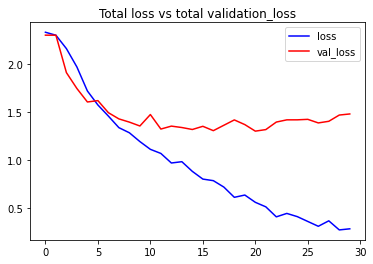

In [27]:
plot_metric(LRCN_model_training_history_,"loss","val_loss","Total loss vs total validation_loss")

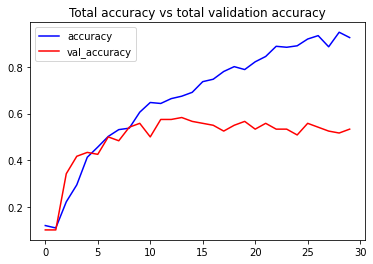

In [28]:
plot_metric(LRCN_model_training_history_,"accuracy","val_accuracy","Total accuracy vs total validation accuracy")

#### Testing against youtube videos

In [33]:
def download_youtube_videos(youtube_video_url,output_directory):
  video = pafy.new(youtube_video_url)
  title = video.title
  video_best = video.getbest()
  output_file_path = f'{output_directory}/{title}.mp4'
  video_best.download(filepath = output_file_path, quiet = True)
  return title

In [ ]:
test_videos_directory = 'test_videos'
os.makedirs(test_videos_directory,exist_ok=True)

name = str(input("Enter video url: "))
video_title = download_youtube_videos(name,test_videos_directory)

input_video_file_path = f'{test_videos_directory}/{video_title}.mp4'

In [35]:
test_videos_directory = 'test_videos'
os.makedirs(test_videos_directory,exist_ok=True)

In [ ]:
#function to predict on video that was just downloaded from the internet

In [ ]:
def predict_on_video(video_file_path,output_file_path,SEQUENCE_LENGTH,model_name):
  video_reader = cv2.VideoCapture(video_file_path)
  video_writer = cv2.VideoWriter(output_file_path, cv2.VideoWriter_fourcc('M','P','4','V'),video_reader.get(cv2.CAP_PROP_FPS),(original_video_width),(original_video_height))
  frames_queue = deque(maxlen = SEQUENCE_LENGTH)
  predicted_class_name = ''
  while video_reader.isOpened():
    ok,frame = video_reader.read()
    if not ok:
      break
    resized_frame = cv2.resize(frame,(IMAGE_HEIGHT,IMAGE_WIDTH))
    normalized_frame = resized_frame/255
    frames_queue.append(normalized_frame)
    if len(frames_queue) == SEQUENCE_LENGTH:
      predicted_label_probabilities = model_name.predict(np.expand_dims(frames_queue,axis = 0))[0]
      predicted_label = np.argmax(predicted_label_probabilities)
      predicted_class_name = CLASSES_LIST[predicted_label]
    cv2.putText(frame,predicted_class_name,(10,30),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    video_writer.write(frame)
  video_reader.release()
  video_writer.release()


In [30]:
def predict_single_action(video_file_path,SEQUENCE_LENGTH):

  video_reader = cv2.VideoCapture(video_file_path)

  original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH)) 
  original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))

  frames_list = []
  predicted_class_name = ''
  video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
  skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH),1)

  for frame_counter in range(SEQUENCE_LENGTH):
    video_reader.set(cv2.CAP_POS_FRAMES, frame_counter * skip_frames_window)
    success, frame = video_reader.read()
    if not success:
      break
    resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
    normalized_frame = cv2.resized_frame/255
    frame_list.append(normalized_frame)
  predicted_labels_probabilities = LRCN_model.predict(np.expand_dims(frames_list,axis=0))[0]
  predicted_label = np.argmax(predicted_labels_probabilities)
  predicted_class_name = CLASSES_LIST[predicted_label]

  #displaying the predicted action along with the predicted confidence
  print(f'Action Predicted: {predicted_class_name}\nConfidence: {predicted_labels_probabilities[predicted_label]}')

  video_reader.release()


In [31]:
video_url = str(input("Enter url of video: "))

Enter url of video:  https://www.youtube.com/watch?v=GZawiOz2GpM


In [37]:
import pafy

In [38]:
video_title = download_youtube_videos(video_url, test_videos_directory)
input_video_file_path = f'{test_videos_directory}/{video_title}.mp4'
#model_name = str(input("Enter model name: "))

#perform single prediction on a test video
predict_single_action(input_video_file_path,SEQUENCE_LENGTH)

#display the input video
VideoFileClip(input_video_file_path, audio=False, target_resolution=(300,None)).ipython_display()

KeyError: 'like_count'